In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [133]:
df = pd.read_csv('players_20.csv')

###### Showing all the columns

In [134]:
pd.options.display.max_columns = None
display(df.head())

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

###### Seperating out the X and Y - Goalkeeper Skill Prediction

In [135]:
goalkeeper = df[df['team_position'] == 'GK']
goalkeeper.head(2)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,90,93,67500000,250000,GK,Right,3,4,1,Medium/Medium,Normal,Yes,143400000.0,NaN,GK,1.0,NaN,2014-07-01,2022.0,SUB,22.0,NaN,NaN,NaN,NaN,NaN,NaN,88.0,85.0,88.0,90.0,45.0,88.0,"Swerve Pass, Acrobatic Clearance, Flair Passes",18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
X = goalkeeper[['age', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_strength', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_composure']]
y = goalkeeper['potential']

###### Train Test Split

In [169]:
from sklearn.model_selection import train_test_split

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1)

In [139]:
X_train.head(2)

,age,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_strength,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_composure
12925,37,62.0,59.0,59.0,62.0,48.0,64.0,48,48,45,63,47,44,45,69,44,18,8,35,62
8985,23,70.0,65.0,60.0,70.0,46.0,61.0,44,48,39,57,59,45,51,54,20,26,15,18,50


In [140]:
X_test.head(2)

,age,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_strength,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_composure
5290,31,70.0,68.0,66.0,68.0,49.0,71.0,45,53,39,66,51,50,61,75,29,28,18,39,48
17341,29,55.0,55.0,52.0,57.0,41.0,55.0,40,42,54,47,49,39,50,61,34,11,13,10,47


In [141]:
y_test.head(2)

5290     70
17341    57
Name: potential, dtype: int64

In [142]:
y_train.head(2)

12925    63
8985     74
Name: potential, dtype: int64

## Regression Models

### 1. Multiple Linear Regression Model

#### Fitting the Model

In [143]:
from sklearn.linear_model import LinearRegression

In [144]:
lm = LinearRegression()

In [145]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###### Prediction from the Model

In [146]:
#Passing in a dataset the model has never seen before = X_Test
predictions = lm.predict(X_test)

###### Comparing with y_test and predictions

In [147]:
#Converting y_test into an Array since predictions is an array as well
y_test1 = np.array(y_test)

np.set_printoptions(precision=2) #Limiting to 2 decimal places

print(np.concatenate((predictions.reshape(len(predictions),1), y_test1.reshape(len(y_test1),1)),1))

[[70.56 70.  ]
 [58.68 57.  ]
 [85.34 86.  ]
 [74.98 76.  ]
 [75.13 75.  ]
 [74.95 75.  ]
 [61.29 61.  ]
 [84.61 84.  ]
 [63.86 65.  ]
 [70.93 74.  ]
 [67.88 66.  ]
 [69.58 69.  ]
 [63.85 65.  ]
 [77.24 77.  ]
 [66.49 66.  ]
 [79.5  80.  ]
 [82.   79.  ]
 [71.83 71.  ]
 [69.92 68.  ]
 [69.09 68.  ]
 [71.83 74.  ]
 [74.72 73.  ]
 [77.02 76.  ]
 [68.53 72.  ]
 [76.03 74.  ]
 [75.7  78.  ]
 [78.39 77.  ]
 [64.06 66.  ]
 [72.53 72.  ]
 [70.95 69.  ]
 [69.98 69.  ]
 [59.43 55.  ]
 [71.53 73.  ]
 [69.48 68.  ]
 [71.74 72.  ]
 [68.59 69.  ]
 [72.36 70.  ]
 [64.28 64.  ]
 [74.05 74.  ]
 [66.77 65.  ]
 [76.96 76.  ]
 [87.5  86.  ]
 [72.93 71.  ]
 [77.04 79.  ]
 [84.68 83.  ]
 [67.3  65.  ]
 [72.3  69.  ]
 [76.89 80.  ]
 [75.36 75.  ]
 [74.59 75.  ]
 [71.33 71.  ]
 [71.26 73.  ]
 [74.43 74.  ]
 [64.23 63.  ]
 [64.48 65.  ]
 [77.15 75.  ]
 [61.16 62.  ]
 [66.56 67.  ]
 [72.79 77.  ]
 [74.51 75.  ]
 [68.26 70.  ]
 [79.28 82.  ]
 [65.15 64.  ]
 [77.21 79.  ]
 [67.23 65.  ]
 [72.11 71.  ]
 [66.2  69

##### Putting the Predictions into the Dataset

In [148]:
X_test.head(2)

,age,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_strength,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_composure
5290,31,70.0,68.0,66.0,68.0,49.0,71.0,45,53,39,66,51,50,61,75,29,28,18,39,48
17341,29,55.0,55.0,52.0,57.0,41.0,55.0,40,42,54,47,49,39,50,61,34,11,13,10,47


In [149]:
y_test.head(2)

5290     70
17341    57
Name: potential, dtype: int64

In [150]:
y_test1

array([70, 57, 86, 76, 75, 75, 61, 84, 65, 74, 66, 69, 65, 77, 66, 80, 79,
       71, 68, 68, 74, 73, 76, 72, 74, 78, 77, 66, 72, 69, 69, 55, 73, 68,
       72, 69, 70, 64, 74, 65, 76, 86, 71, 79, 83, 65, 69, 80, 75, 75, 71,
       73, 74, 63, 65, 75, 62, 67, 77, 75, 70, 82, 64, 79, 65, 71, 69, 65,
       72, 69, 80, 70, 71, 67, 69, 78, 64, 84, 78, 67, 72, 67, 62, 76, 68,
       73, 77, 93, 84, 70, 67, 79, 78, 68, 69, 71, 85, 79, 77, 64, 85, 82,
       79, 87, 75, 79, 71, 65, 72, 70, 83, 68, 67, 75, 81, 75, 74, 72, 77,
       81, 72, 74, 72, 67, 83, 72, 76, 74, 70, 69, 68, 72, 76, 67, 68, 70,
       67, 73, 73, 80, 68, 71, 75, 74, 68, 69, 73, 69, 78, 74, 87, 76, 69,
       66, 73, 68, 67, 70, 69, 65, 79, 68, 65, 72, 78, 82, 62, 90, 58, 88,
       68, 63, 69, 73, 67, 67, 79, 73, 78, 85, 67, 89, 79, 73, 74, 82, 66,
       69, 74, 69, 74, 79, 79, 87, 71, 66, 69, 82, 74, 67, 63, 69, 69, 67,
       86, 78, 69, 69, 77, 79, 71, 76, 70, 75, 75, 81, 70, 69, 80, 71, 75,
       79, 69, 72, 76, 70

In [170]:
predictions

array([70.56, 58.68, 85.34, 74.98, 75.13, 74.95, 61.29, 84.61, 63.86,
       70.93, 67.88, 69.58, 63.85, 77.24, 66.49, 79.5 , 82.  , 71.83,
       69.92, 69.09, 71.83, 74.72, 77.02, 68.53, 76.03, 75.7 , 78.39,
       64.06, 72.53, 70.95, 69.98, 59.43, 71.53, 69.48, 71.74, 68.59,
       72.36, 64.28, 74.05, 66.77, 76.96, 87.5 , 72.93, 77.04, 84.68,
       67.3 , 72.3 , 76.89, 75.36, 74.59, 71.33, 71.26, 74.43, 64.23,
       64.48, 77.15, 61.16, 66.56, 72.79, 74.51, 68.26, 79.28, 65.15,
       77.21, 67.23, 72.11, 66.2 , 66.23, 71.74, 69.97, 80.6 , 70.92,
       72.23, 66.77, 67.01, 75.92, 66.32, 85.02, 73.04, 67.66, 70.71,
       67.66, 59.3 , 74.06, 67.05, 73.83, 74.55, 93.62, 83.14, 68.92,
       66.89, 79.74, 79.49, 67.01, 67.89, 72.54, 81.77, 79.16, 74.47,
       66.25, 81.61, 82.43, 78.4 , 87.4 , 71.3 , 79.64, 72.84, 63.73,
       73.55, 65.17, 80.24, 65.95, 70.24, 75.56, 74.04, 71.79, 74.38,
       72.46, 77.86, 79.41, 73.42, 73.31, 70.41, 67.62, 81.99, 73.23,
       75.15, 71.62,

In [167]:
#Adding the Actual Potential into the X_test dataset

In [152]:
X_test['Potential Skill'] = y_test1

In [153]:
#Adding the Predicted skill into the dataset

In [154]:
X_test['Predicted Skill'] = predictions

In [168]:
X_test.head(3)

,age,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_strength,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_composure,Potential Skill,Predicted Skill
5290,31,70.0,68.0,66.0,68.0,49.0,71.0,45,53,39,66,51,50,61,75,29,28,18,39,48,70,70.558782
17341,29,55.0,55.0,52.0,57.0,41.0,55.0,40,42,54,47,49,39,50,61,34,11,13,10,47,57,58.681874
427,23,80.0,78.0,74.0,82.0,50.0,79.0,53,48,64,80,30,56,61,70,26,21,11,60,64,86,85.341353


###### Mapping the Predicted Skill into the main dataset

In [156]:
## Merging on Index
df_merged = df.merge(X_test, how='outer', left_index=True, right_index=True)

In [157]:
#Dropping values with NAN for Predicted Skill
df_merged = df_merged.dropna(subset=['Predicted Skill'])

In [158]:
#Selecting on the basis of row
df_merged.loc[:, ['short_name', 'potential', 'Potential Skill', 'Predicted Skill']]

,short_name,potential,Potential Skill,Predicted Skill
3,J. Oblak,93,93.0,93.616927
13,Alisson,91,91.0,90.349460
14,De Gea,90,90.0,89.953087
25,Ederson,91,91.0,90.479712
28,T. Courtois,89,89.0,88.997846
...,...,...,...,...
16335,Dong Chunyu,58,58.0,62.340379
16961,Bao Yaxiong,65,65.0,63.848995
17072,Shen Jun,56,56.0,56.632438
17341,M. McGinley,57,57.0,58.681874


###### Comparing Predictions with Y_test

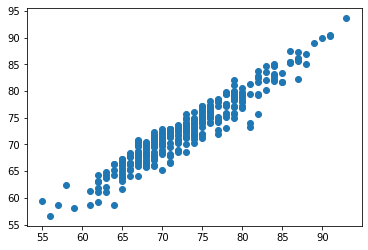

In [159]:
#Finding how far off the Predicted prices = X_Test are from Actual Prices = y_test
plt.scatter(y_test,predictions)

###### Model Evaluation

In [160]:
print(lm.intercept_)

25.94982386451079


In [161]:
lm.coef_

array([-0.66,  0.23,  0.22, -0.3 ,  0.17, -0.05,  0.2 , -0.02,  0.04,
       -0.01,  0.06,  0.02,  0.5 ,  0.03, -0.02,  0.02, -0.02, -0.04,
       -0.  ,  0.  ])

In [162]:
X.columns

Index(['age', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes',
       'gk_speed', 'gk_positioning', 'movement_acceleration',
       'movement_sprint_speed', 'movement_agility', 'movement_reactions',
       'movement_balance', 'power_shot_power', 'power_jumping',
       'power_strength', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_composure'],
      dtype='object')

In [163]:
coef_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coef_df

,Coefficient
age,-0.659151
gk_diving,0.234021
gk_handling,0.221258
gk_kicking,-0.297804
gk_reflexes,0.167988
gk_speed,-0.053965
gk_positioning,0.198975
movement_acceleration,-0.016891
movement_sprint_speed,0.036684
movement_agility,-0.006012


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Age** is associated with an **decrease of 0.659151** overall skill.
- Holding all other features fixed, a 1 unit increase in **gk_diving** is associated with an **increase of 0.234021** overall skill.

**And so on**

###### Metrics

In [164]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) #The lower the better

MAE: 1.5305348939734964
MSE: 3.788888658580173
RMSE: 1.9465067835946972


###### Calculating the R2

In [165]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.9135592465438014